In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn

In [2]:
matches=pd.read_csv("./matches.csv")
deliveries=pd.read_csv("./deliveries.csv")

In [3]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
print(matches.shape,deliveries.shape)

(756, 18) (179078, 21)


In [8]:
total_run_df=deliveries.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()
total_run_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [9]:
first_in=total_run_df[total_run_df["inning"]==1]
first_in["target"]=first_in["total_runs"]+1
matches=pd.merge(matches,first_in[["match_id","target"]],left_on="id",right_on="match_id")

<ipython-input-9-7c5b69650d5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_in["target"]=first_in["total_runs"]+1


In [10]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,target
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158


In [11]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [12]:
teams = [
    'Deccan Chargers',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Daredevils'
]

In [13]:
matches=matches[matches["team1"].isin(teams)]
matches=matches[matches["team2"].isin(teams)]

In [14]:
matches["team1"].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers'],
      dtype=object)

In [15]:
matches=matches[matches["dl_applied"]!=1]

In [16]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'target'],
      dtype='object')

In [17]:
matches_=matches[["match_id","city","winner","target"]]
combine_df=matches.merge(deliveries,on="match_id")

In [18]:
combine_df.isnull().sum()

id                       0
Season                   0
city                  1204
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 309
win_by_runs              0
win_by_wickets           0
player_of_match        309
venue                    0
umpire1                248
umpire2                248
umpire3             106703
match_id                 0
target                   0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
p

In [19]:
combine_df=combine_df[combine_df["inning"]==2]

In [20]:
combine_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'target', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [21]:
combine_df["current_runs"]=combine_df.groupby("match_id").cumsum()["total_runs"]

In [22]:
combine_df["runs_to_win"]=combine_df["target"]-combine_df["current_runs"]

In [23]:
combine_df["ball_remaining"]=126-combine_df["over"]*6+combine_df["ball"]

In [24]:
#Player dismissed
combine_df["player_dismissed"]=combine_df["player_dismissed"].fillna(0)
combine_df["player_dismissed"]=combine_df["player_dismissed"].apply(lambda x:x if x==0 else 1)

In [25]:
combine_df["wickets_fallen"]=combine_df.groupby("match_id").cumsum()["player_dismissed"]

In [26]:
combine_df["wickets_pending"]=10-combine_df["wickets_fallen"]

In [27]:
combine_df["wickets_pending"]

124       10
125       10
126       10
127       10
128       10
          ..
123905     5
123906     5
123907     4
123908     4
123909     3
Name: wickets_pending, Length: 59922, dtype: int64

In [28]:
combine_df["curr_rate"]=combine_df["current_runs"]/combine_df["over"]
combine_df["req_run"]=(combine_df["runs_to_win"])/((combine_df["ball_remaining"])/6)

In [29]:
def getWinner(value):
    return 1 if value["batting_team"]==value["winner"] else 0
    
combine_df["result"]=combine_df.apply(getWinner,axis=1)

In [30]:
combine_df["result"].value_counts()

1    31269
0    28653
Name: result, dtype: int64

In [31]:
combine_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'target', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_runs',
       'runs_to_win', 'ball_remaining', 'wickets_fallen', 'wickets_pending',
       'curr_rate', 'req_run'],
      dtype='object')

In [32]:
final_df=combine_df[["city","result",
                     "wickets_fallen",
                     "runs_to_win",
                     "batting_team",
                     "bowling_team",
                     "curr_rate",
                     "req_run",
                     "target",
                     "ball_remaining"]]

In [33]:
final_df.head()

,city,result,wickets_fallen,runs_to_win,batting_team,bowling_team,curr_rate,req_run,target,ball_remaining
124,Bangalore,0,0,158,Delhi Daredevils,Royal Challengers Bangalore,0.0,7.834711,158,121
125,Bangalore,0,0,157,Delhi Daredevils,Royal Challengers Bangalore,1.0,7.721311,158,122
126,Bangalore,0,0,157,Delhi Daredevils,Royal Challengers Bangalore,1.0,7.658537,158,123
127,Bangalore,0,0,156,Delhi Daredevils,Royal Challengers Bangalore,2.0,7.548387,158,124
128,Bangalore,0,0,156,Delhi Daredevils,Royal Challengers Bangalore,2.0,7.488000,158,125


In [34]:
final_df.shape

(59922, 10)

In [35]:
final_df.isnull().sum()

city              583
result              0
wickets_fallen      0
runs_to_win         0
batting_team        0
bowling_team        0
curr_rate           0
req_run             0
target              0
ball_remaining      0
dtype: int64

In [36]:
final_df=final_df.dropna()

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

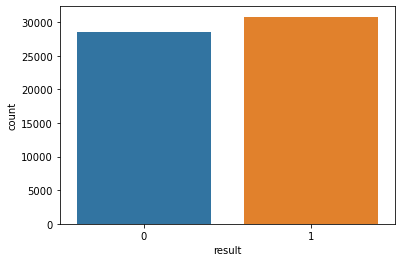

In [37]:
sbn.countplot(final_df["result"])

In [38]:
final_df.head()

,city,result,wickets_fallen,runs_to_win,batting_team,bowling_team,curr_rate,req_run,target,ball_remaining
124,Bangalore,0,0,158,Delhi Daredevils,Royal Challengers Bangalore,0.0,7.834711,158,121
125,Bangalore,0,0,157,Delhi Daredevils,Royal Challengers Bangalore,1.0,7.721311,158,122
126,Bangalore,0,0,157,Delhi Daredevils,Royal Challengers Bangalore,1.0,7.658537,158,123
127,Bangalore,0,0,156,Delhi Daredevils,Royal Challengers Bangalore,2.0,7.548387,158,124
128,Bangalore,0,0,156,Delhi Daredevils,Royal Challengers Bangalore,2.0,7.488000,158,125


In [39]:
final_df=final_df[final_df["ball_remaining"]!=0]

In [40]:
final_df.head()

,city,result,wickets_fallen,runs_to_win,batting_team,bowling_team,curr_rate,req_run,target,ball_remaining
124,Bangalore,0,0,158,Delhi Daredevils,Royal Challengers Bangalore,0.0,7.834711,158,121
125,Bangalore,0,0,157,Delhi Daredevils,Royal Challengers Bangalore,1.0,7.721311,158,122
126,Bangalore,0,0,157,Delhi Daredevils,Royal Challengers Bangalore,1.0,7.658537,158,123
127,Bangalore,0,0,156,Delhi Daredevils,Royal Challengers Bangalore,2.0,7.548387,158,124
128,Bangalore,0,0,156,Delhi Daredevils,Royal Challengers Bangalore,2.0,7.488000,158,125


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [67]:
X=final_df.drop("result",axis=1)
y=final_df["result"]

In [43]:
encoder=OneHotEncoder()
encoded_x=encoder.fit_transform(X).toarray()
encoded_x

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(encoded_x, y, test_size=0.30, random_state=42)

In [45]:
model=LogisticRegression()
model.fit(X_train,y_train)

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
predictions=model.predict(X_test)

In [47]:
accuracy_score(y_test,predictions)

0.8628244017526121

In [48]:
confusion_matrix(y_test,predictions)

array([[7257, 1243],
       [1199, 8103]])

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      8500
           1       0.87      0.87      0.87      9302

    accuracy                           0.86     17802
   macro avg       0.86      0.86      0.86     17802
weighted avg       0.86      0.86      0.86     17802



In [50]:
X_test[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [59]:
y=np.array(y_test)

In [52]:
pred=model.predict([X_test[2]])

In [53]:
pred

array([1], dtype=int64)

In [54]:
y[2]

1

In [ ]:
pipe.predict()

In [57]:
X.shape

(59339, 9)

In [58]:
y.shape

(17802,)

In [ ]:
X_train.shape

In [61]:
X_train.shape

(41537, 10874)

In [62]:
y_train.shape

(41537,)

In [68]:
X.shape

(59339, 9)

In [69]:
y.shape

(59339,)